### Logistic Regression

### Telecom customer churn

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
churn_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/9b593e11-856c-4ab9-982d-931c4548aea2/churn_data.csv')
internet_usage = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/c62c0489-fc52-4b8a-a464-b1f5c94304af/internet_data.csv')
customer_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/f9ff4b35-a538-4910-9655-de03027f10b4/customer_data.csv')

In [3]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
internet_usage.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
telecom_data = pd.merge(churn_data, internet_usage, how='inner', on='customerID')

In [7]:
telecom_data = pd.merge(telecom_data, customer_data, how='inner', on='customerID')

In [8]:
telecom_data.OnlineBackup.astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [9]:
telecom_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No


In [10]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
telecom_data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
telecom_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [13]:
telecom_data.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
telecom_data.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
telecom_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
telecom_data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
telecom_data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [18]:
telecom_data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
telecom_data.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [20]:
telecom_data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
telecom_data.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
telecom_data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
telecom_data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
telecom_data.SeniorCitizen.unique()

array([0, 1])

In [25]:
telecom_data.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
telecom_data.Dependents.unique()

array(['No', 'Yes'], dtype=object)

### Data Cleaning

In [27]:
def map_boolean(x):
    return x.map({'Yes': 1, 'No': 0})

bool_columns = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
telecom_data[bool_columns] = telecom_data[bool_columns].apply(map_boolean)

In [28]:
def create_dummies(_data, _columns):
    for _column in _columns:
        _dummy_data = pd.get_dummies(_data[_column], drop_first=True, prefix=_column)
        _data = pd.concat([_data, _dummy_data], axis=1)
        _data.drop(columns=[_column], inplace=True, axis=1)
    return _data


In [29]:
first_dummy_variables = ['PaymentMethod', 'Contract', 'InternetService', 'gender']
telecom_data = create_dummies(telecom_data, first_dummy_variables)

In [30]:
telecom_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'SeniorCitizen', 'Partner',
       'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_Male'],
      dtype='object')

In [31]:
extra_dummies = pd.get_dummies(telecom_data['MultipleLines'], prefix='MultipleLines')
extra_dummies.drop('MultipleLines_No phone service', inplace=True, axis=1)
telecom_data.drop('MultipleLines', axis=1, inplace=True)
telecom_data = pd.concat([telecom_data, extra_dummies], axis=1)

extra_dummies = pd.get_dummies(telecom_data['OnlineSecurity'], prefix='OnlineSecurity')
extra_dummies.drop('OnlineSecurity_No internet service', inplace=True, axis=1)
telecom_data.drop('OnlineSecurity', axis=1, inplace=True)
telecom_data = pd.concat([telecom_data, extra_dummies], axis=1)

extra_dummies = pd.get_dummies(telecom_data['OnlineBackup'], prefix='OnlineBackup')
extra_dummies.drop('OnlineBackup_No internet service', inplace=True, axis=1)
telecom_data.drop('OnlineBackup', axis=1, inplace=True)
telecom_data = pd.concat([telecom_data, extra_dummies], axis=1)

extra_dummies = pd.get_dummies(telecom_data['DeviceProtection'], prefix='DeviceProtection')
extra_dummies.drop('DeviceProtection_No internet service', inplace=True, axis=1)
telecom_data.drop('DeviceProtection', axis=1, inplace=True)
telecom_data = pd.concat([telecom_data, extra_dummies], axis=1)


extra_dummies = pd.get_dummies(telecom_data['TechSupport'], prefix='TechSupport')
extra_dummies.drop('TechSupport_No internet service', inplace=True, axis=1)
telecom_data.drop('TechSupport', axis=1, inplace=True)
telecom_data = pd.concat([telecom_data, extra_dummies], axis=1)

extra_dummies = pd.get_dummies(telecom_data['StreamingTV'], prefix='StreamingTV')
extra_dummies.drop('StreamingTV_No internet service', inplace=True, axis=1)
telecom_data.drop('StreamingTV', axis=1, inplace=True)
telecom_data = pd.concat([telecom_data, extra_dummies], axis=1)

extra_dummies = pd.get_dummies(telecom_data['StreamingMovies'], prefix='StreamingMovies')
extra_dummies.drop('StreamingMovies_No internet service', inplace=True, axis=1)
telecom_data.drop('StreamingMovies', axis=1, inplace=True)
telecom_data = pd.concat([telecom_data, extra_dummies], axis=1)
telecom_data.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [32]:
telecom_data.TotalCharges = telecom_data.TotalCharges.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [33]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check               7043 non-null uint8
Contract_One year                        7043 non-null uint8
Contract_Two year                 

In [34]:
telecom_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [35]:
telecom_data[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
max,72.000000,118.750000,1.000000,8684.800000


In [36]:
telecom_data.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
Contract_One year                         0
Contract_Two year                         0
InternetService_Fiber optic               0
InternetService_No                        0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [37]:
round((100 * (telecom_data.isnull().sum() / len(telecom_data.index))), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [38]:
telecom_data = telecom_data[~np.isnan(telecom_data.TotalCharges)]

In [39]:
round((100 * (telecom_data.isnull().sum() / len(telecom_data.index))), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

### Spliting the data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
churn_data = telecom_data.Churn
telecom_data.drop(['customerID', 'Churn'], axis=1, inplace=True)
telecom_data.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [42]:
x_train, x_test, y_train, y_test = train_test_split(telecom_data, churn_data, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
y_train.shape

(4922,)

In [44]:
y_test.shape

(2110,)

In [45]:
x_train.shape

(4922, 30)

In [46]:
x_test.shape

(2110, 30)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
x_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(x_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [49]:
x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,1,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [53]:
print(telecom_data.corr())

                                         tenure  PhoneService  \
tenure                                 1.000000      0.007877   
PhoneService                           0.007877      1.000000   
PaperlessBilling                       0.004823      0.016696   
MonthlyCharges                         0.246862      0.248033   
TotalCharges                           0.825880      0.113008   
SeniorCitizen                          0.015683      0.008392   
Partner                                0.381912      0.018397   
Dependents                             0.163386     -0.001078   
PaymentMethod_Credit card (automatic)  0.232800     -0.006916   
PaymentMethod_Electronic check        -0.210197      0.002747   
PaymentMethod_Mailed check            -0.232181     -0.004463   
Contract_One year                      0.202338     -0.003142   
Contract_Two year                      0.563801      0.004442   
InternetService_Fiber optic            0.017930      0.290183   
InternetService_No       

**Remove highly co-related variables:**

In [54]:
_col = ['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No']
x_train.drop(_col, axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [55]:
x_test.drop(_col, axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
x_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_Male', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

### Build Model:

In [64]:
churn_model = sm.GLM(y_train, sm.add_constant(x_train), family=sm.families.Binomial()).fit()

In [66]:
print(churn_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 29 May 2019   Deviance:                       4009.4
Time:                        11:05:31   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0

#### Use RFE 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [68]:
logistic = LogisticRegression()
rfe = RFE(logistic, 15)
rfe = rfe.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [71]:
rfe.ranking_

array([1, 1, 1, 6, 1, 1, 8, 4, 1, 3, 1, 1, 1, 1, 1, 9, 1, 1, 2, 7, 1, 1,
       5])

In [72]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 4),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('gender_Male', False, 9),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 5)]

### Predict the model: 

In [78]:
_col = x_train.columns[rfe.support_]
x_train_const = sm.add_constant(x_train[_col])
model = sm.GLM(y_train, x_train_const).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.13805
Method:                          IRLS   Log-Likelihood:                -2102.8
Date:                Wed, 29 May 2019   Deviance:                       677.26
Time:                        12:23:35   Pearson chi2:                     677.
No. Iterations:                     3   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2327      0.025      9.462      0

In [80]:
y_train_predicted = model.predict(x_train_const)

In [81]:
y_train_predicted[:10]

879     0.339574
5790    0.348783
6498    0.619603
880     0.528543
2784    0.620833
3874    0.403066
5387    0.344147
6623    0.749730
4465    0.287340
5364    0.508613
dtype: float64

In [85]:
y_train_predicted = y_train_predicted.values.reshape(-1)
y_train_predicted[:10]

array([0.33957385, 0.34878327, 0.61960273, 0.52854265, 0.62083262,
       0.40306597, 0.34414659, 0.74972964, 0.2873396 , 0.50861313])

#### Assess the model:

In [87]:
churn_predicted = pd.DataFrame({'Churn': y_train, 'Churn_Probability': y_train_predicted})
churn_predicted['predicted'] = churn_predicted.Churn_Probability.map(lambda x: 1 if x > 0.5 else 0)
churn_predicted.head()

,Churn,Churn_Probability,predicted
879,0,0.339574,0
5790,0,0.348783,0
6498,1,0.619603,1
880,1,0.528543,1
2784,1,0.620833,1


In [91]:
metrics.confusion_matrix(churn_predicted.Churn, churn_predicted.predicted)

array([[3298,  337],
       [ 633,  654]])

In [92]:
print(metrics.accuracy_score(churn_predicted.Churn, churn_predicted.predicted))

0.8029256399837464


#### Calculate VFI

In [104]:
vfi = pd.DataFrame({"columns": _col})
vfi['VFI_VALUE'] = [variance_inflation_factor(x_train[_col].values, i) for i in range(x_train[_col].shape[1])]
vfi['VFI_VALUE'] = round(vfi['VFI_VALUE'], 2)
vfi = vfi.sort_values(by='VFI_VALUE', ascending=False)
vfi

,columns,VFI_VALUE
1,PhoneService,8.86
3,TotalCharges,7.37
0,tenure,6.88
9,InternetService_Fiber optic,3.97
8,Contract_Two year,3.28
10,InternetService_No,3.25
2,PaperlessBilling,2.68
11,MultipleLines_Yes,2.53
14,StreamingTV_Yes,2.34
13,TechSupport_Yes,2.08


In [110]:
_col = _col.tolist() 
_col.remove('PhoneService')
_col

['tenure',
 'PaperlessBilling',
 'TotalCharges',
 'SeniorCitizen',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'Contract_One year',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes']

In [113]:
x_train_const = sm.add_constant(x_train[_col])
model2 = sm.GLM(y_train, x_train_const).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13803
Method:                          IRLS   Log-Likelihood:                -2103.0
Date:                Thu, 30 May 2019   Deviance:                       677.32
Time:                        10:08:26   Pearson chi2:                     677.
No. Iterations:                     3   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2226      0.019     11.617      0

#### calculate VFI:

In [119]:
vfi = pd.DataFrame({"column": _col})
vfi['VFI_VALUE'] = [variance_inflation_factor(x_train[_col].values, i) for i in range(x_train[_col].shape[1])]
vfi['VFI_VALUE'] = round(vfi['VFI_VALUE'], 2)
vfi = vfi.sort_values(by='VFI_VALUE', ascending=False)
vfi

,column,VFI_VALUE
2,TotalCharges,7.30
0,tenure,6.79
7,Contract_Two year,3.16
8,InternetService_Fiber optic,2.94
9,InternetService_No,2.53
1,PaperlessBilling,2.52
13,StreamingTV_Yes,2.31
10,MultipleLines_Yes,2.27
12,TechSupport_Yes,2.00
6,Contract_One year,1.83


#### Assess the model: 

In [121]:
y_train_predicted = model2.predict(x_train_const)

In [123]:
y_train_predicted = y_train_predicted.values.reshape(-1)
y_train_predicted

array([0.34234778, 0.34052028, 0.6205252 , ..., 0.05165175, 0.12514006,
       0.06424628])

In [126]:
churn_predicted = pd.DataFrame({'ChurnProbability': y_train_predicted, 'y_train': y_train})
churn_predicted['ChurnPredicted'] = churn_predicted['ChurnProbability'].map(lambda x: 1 if x > 0.5 else 0)
churn_predicted.head()

,ChurnProbability,y_train,ChurnPredicted
879,0.342348,0,0
5790,0.340520,0,0
6498,0.620525,1,1
880,0.530313,1,1
2784,0.622691,1,1


In [133]:
confusion_matrix = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted.ChurnPredicted)
confusion_matrix

array([[3297,  338],
       [ 631,  656]])

In [132]:
round(metrics.accuracy_score(churn_predicted.y_train, churn_predicted.ChurnPredicted), 3)

0.803

In [136]:
TN = confusion_matrix[0, 0] # True negative
FP = confusion_matrix[0, 1] # False positive
FN = confusion_matrix[1, 0] # False negatives
TP = confusion_matrix[1, 1] # True positive

In [137]:
TN

3297

In [138]:
def sensitivity(tp, fn):
    return round(tp/(tp+fn), 2)

sensitivity(TP, FN)

0.51

In [139]:
def specificity(tn, fp):
    return round(tn/(tn+fp), 2)
specificity(TN, FP)

0.91

In [140]:
vfi = pd.DataFrame({"columns": _col})
vfi['VFI_VALUE'] = [variance_inflation_factor(x_train[_col].values, i) for i in range(x_train[_col].shape[1])]
vfi['VFI_VALUE'] = round(vfi['VFI_VALUE'], 2)
vfi = vfi.sort_values(by='VFI_VALUE', ascending=False)
vfi

,columns,VFI_VALUE
2,TotalCharges,7.30
0,tenure,6.79
7,Contract_Two year,3.16
8,InternetService_Fiber optic,2.94
9,InternetService_No,2.53
1,PaperlessBilling,2.52
13,StreamingTV_Yes,2.31
10,MultipleLines_Yes,2.27
12,TechSupport_Yes,2.00
6,Contract_One year,1.83


In [142]:
_col.remove('TotalCharges')
_col

['tenure',
 'PaperlessBilling',
 'SeniorCitizen',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'Contract_One year',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes']

In [143]:
x_train_const = sm.add_constant(x_train[_col])
model2 = sm.GLM(y_train, x_train_const).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13940
Method:                          IRLS   Log-Likelihood:                -2127.8
Date:                Thu, 30 May 2019   Deviance:                       684.18
Time:                        11:32:48   Pearson chi2:                     684.
No. Iterations:                     3   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2765      0.018     15.661      0

In [144]:
vfi = pd.DataFrame({"columns": _col})
vfi['VFI_VALUE'] = [variance_inflation_factor(x_train[_col].values, i) for i in range(x_train[_col].shape[1])]
vfi['VFI_VALUE'] = round(vfi['VFI_VALUE'], 2)
vfi = vfi.sort_values(by='VFI_VALUE', ascending=False)
vfi

,columns,VFI_VALUE
6,Contract_Two year,3.07
7,InternetService_Fiber optic,2.60
1,PaperlessBilling,2.44
9,MultipleLines_Yes,2.24
12,StreamingTV_Yes,2.17
8,InternetService_No,2.12
0,tenure,2.04
11,TechSupport_Yes,1.98
5,Contract_One year,1.82
10,OnlineSecurity_Yes,1.78


In [145]:
y_train_predicted = model2.predict(x_train_const)
y_train_predicted = y_train_predicted.values.reshape(-1)


In [146]:
round(metrics.accuracy_score(churn_predicted.y_train, churn_predicted.ChurnPredicted), 3)

0.803

In [148]:
churn_predicted = pd.DataFrame({'ChurnProbability': y_train_predicted, 'y_train': y_train})
churn_predicted['ChurnPredicted'] = churn_predicted['ChurnProbability'].map(lambda x: 1 if x > 0.5 else 0)
churn_predicted.head()

,ChurnProbability,y_train,ChurnPredicted
879,0.345116,0,0
5790,0.325688,0,0
6498,0.614704,1,1
880,0.465858,1,0
2784,0.567556,1,1


In [149]:
metrics.confusion_matrix(churn_predicted.ChurnPredicted, churn_predicted.y_train)

array([[3319,  659],
       [ 316,  628]])

In [150]:
TN = confusion_matrix[0, 0] # True negative
FP = confusion_matrix[0, 1] # False positive
FN = confusion_matrix[1, 0] # False negatives
TP = confusion_matrix[1, 1] # True positive

In [151]:
sensitivity(TP, FN)

0.51

In [152]:
specificity(TN, FP)

0.91

In [154]:
churn_predicted.to_csv("predicted_churn.csv")

### ROC Curve:

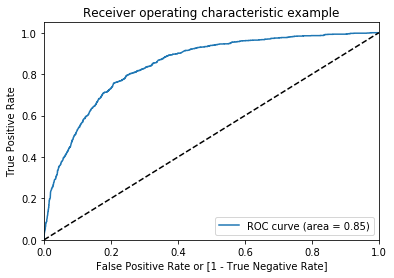

In [165]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(churn_predicted.y_train, churn_predicted.ChurnProbability)

## ROC: POC

In [168]:
def pdf(x, std, mean):
    const = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = const*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist
x = np.linspace(0, 1, num=100)
good_pdf = pdf(x,0.1,0.4)
bad_pdf = pdf(x,0.1,0.6)

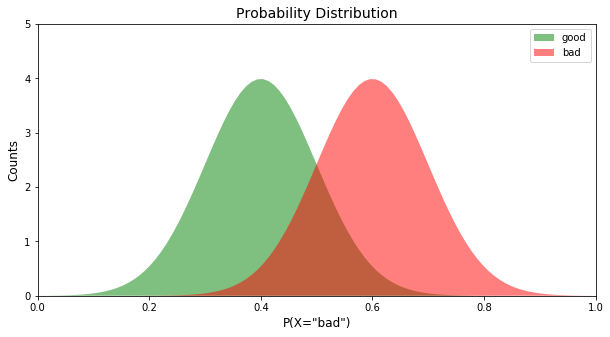

In [182]:
def plot_pdf(good_pdf, bad_pdf, ax):
    ax.fill(x, good_pdf, "g", alpha=0.5)
    ax.fill(x, bad_pdf,"r", alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,5])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X="bad")', fontsize=12)
    ax.legend(["good","bad"])

fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax)

In [188]:
def plot_roc(good_pdf, bad_pdf, ax):
    #Total
    total_bad = np.sum(bad_pdf)
    total_good = np.sum(good_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0:
            cum_TP+=bad_pdf[len(x)-1-i]
            cum_FP+=good_pdf[len(x)-1-i]
        FPR=cum_FP/total_good
        TPR=cum_TP/total_bad
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 100 timesteps into account
    auc=np.sum(TPR_list)/100
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

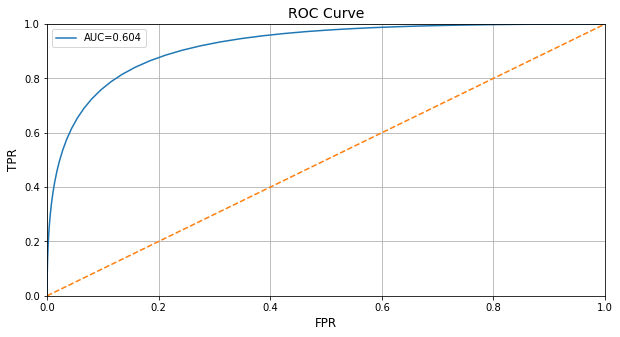

In [189]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_roc(good_pdf, bad_pdf, ax)

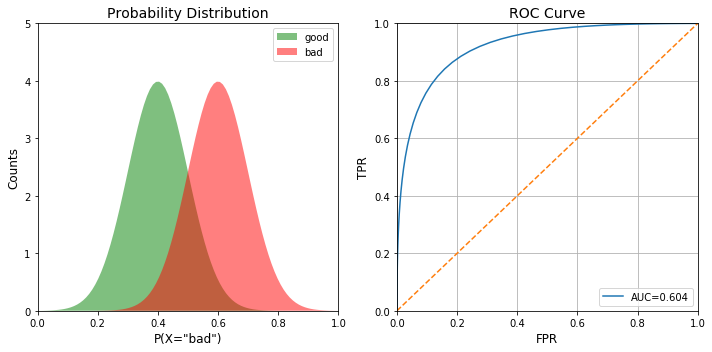

In [190]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax[0])
plot_roc(good_pdf, bad_pdf, ax[1])
plt.tight_layout()

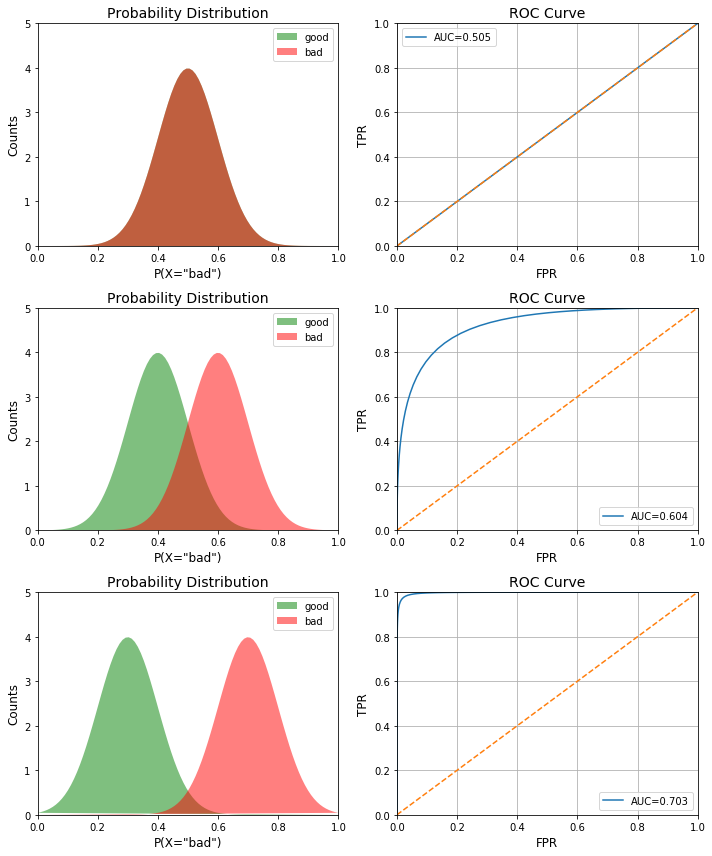

In [191]:
x = np.linspace(0, 1, num=100)
fig, ax = plt.subplots(3,2, figsize=(10,12))
means_tuples = [(0.5,0.5),(0.4,0.6),(0.3,0.7)]
i=0
for good_mean, bad_mean in means_tuples:
    good_pdf = pdf(x, 0.1, good_mean)
    bad_pdf  = pdf(x, 0.1, bad_mean)
    plot_pdf(good_pdf, bad_pdf, ax[i,0])
    plot_roc(good_pdf, bad_pdf, ax[i,1])
    i+=1
plt.tight_layout()

### Optimal theshould:

In [192]:
churn_predicted.head()

,ChurnProbability,y_train,ChurnPredicted
879,0.345116,0,0
5790,0.325688,0,0
6498,0.614704,1,1
880,0.465858,1,0
2784,0.567556,1,1


In [224]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ]
    
cutoff

0.0 19
0.1 46
0.2 92
0.3 234
0.4 384
0.5 659
0.6 959
0.7 1224
0.8 1287
0.9 1287


,prob,accuracy,sensitivity,specificity
0.0,0.0,0.410,0.985,0.206
0.1,0.1,0.527,0.964,0.373
0.2,0.2,0.641,0.929,0.539
0.3,0.3,0.741,0.818,0.714
0.4,0.4,0.793,0.702,0.826
0.5,0.5,0.802,0.488,0.913
0.6,0.6,0.786,0.255,0.974
0.7,0.7,0.749,0.049,0.997
0.8,0.8,0.739,0.000,1.000
0.9,0.9,0.739,0.000,1.000


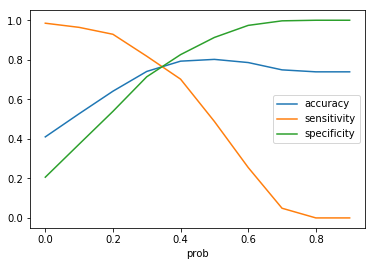

In [223]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

##### Optimal solution we can findout at 0.3 probability where it has stabilized the accuacy, sensitivity, specificity

### Prediction: 

In [225]:
_col

['tenure',
 'PaperlessBilling',
 'SeniorCitizen',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'Contract_One year',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes']

In [226]:
y_test.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn, dtype: int64

In [229]:
x_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(x_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [230]:
x_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,InternetService_Fiber optic,InternetService_No,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,1,0.499951,-0.128378,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3730,0.999203,1,1,1.319685,1.600302,0,1,0,1,0,...,1,0,0,1,0,1,1,0,1,1
1761,1.040015,1,1,-1.342374,-0.343297,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,0
2283,-1.286319,1,1,0.223935,-0.979170,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1872,0.346196,1,0,-1.500335,-0.656086,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [231]:
x_test_const = sm.add_constant(x_test[_col])
y_predi = model2.predict(x_test_const)

In [236]:
test_chrun_pred = pd.DataFrame({'y_test': y_test, 'probability': y_predi.values.reshape(-1)})
test_chrun_pred['0.3_predict'] = test_chrun_pred.probability.map(lambda x: 1 if x > 0.3 else 0)
test_chrun_pred.head()

,y_test,probability,0.3_predict
942,0,0.440949,1
3730,1,0.339075,1
1761,0,-0.040902,0
2283,1,0.543455,1
1872,0,0.030357,0


In [238]:
metrics.accuracy_score(test_chrun_pred.y_test, test_chrun_pred['0.3_predict'])

0.714218009478673

In [239]:
cm = metrics.confusion_matrix(test_chrun_pred.y_test, test_chrun_pred['0.3_predict'])

In [241]:
# ===> Sensitivity
cm[1,1] / (cm[1, 0] + cm[1,1])

0.7835051546391752

In [242]:
# =====> Specificity
cm[0,0] / (cm[0,0] + cm[0,1])

0.68782722513089